In [2]:
import numpy as np
import matplotlib.pyplot as plt

#**5.1. Itô integrals**

\begin{align}
        \int_0^{t} B_s \, \mathrm{d}B_s. \\[1em]
    \end{align}

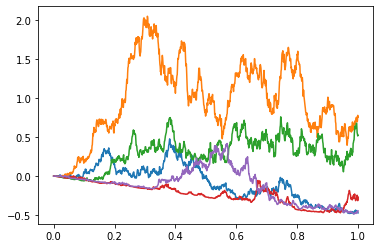

In [ ]:
np.random.seed(31)
I = []
for i in range(5):
  It = [0]
  B = [0]
  B3 = [0]
  for j in range(1000):
    B.append(np.sqrt(0.001) * np.random.standard_normal() + B[-1])
    B3.append(4 * B[-1]**3)
    It.append(B[-2] * (B[-1] - B[-2]) + It[-1])
  I.append(It)
x = np.linspace(0.0, 1.0, 1001)
for i in range(5):
  plt.plot(x, I[i])

\begin{align}
        \int_0^{t} 4 B_s^3 \, \mathrm{d}B_s. \\[1em]
    \end{align}

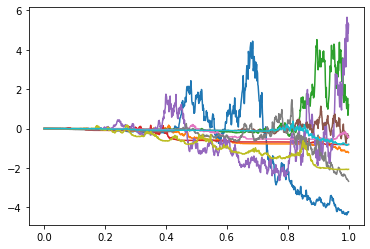

In [ ]:
np.random.seed(50)
I1 = []
for i in range(10):
  It1 = [0]
  B = [0]
  B3 = [0]
  for j in range(1000):
    B.append(np.sqrt(0.001) * np.random.standard_normal() + B[-1])
    B3.append(4 * B[-1]**3)
    It1.append(B3[-2] * (B[-1] - B[-2]) + It1[-1])
  I1.append(It1)
x = np.linspace(0.0, 1.0, 1001)
for i in range(10):
  plt.plot(x, I1[i])

\begin{align}
        \int_0^{t} cos \, B_s \, \mathrm{d}B_s. \\[1em]
    \end{align}

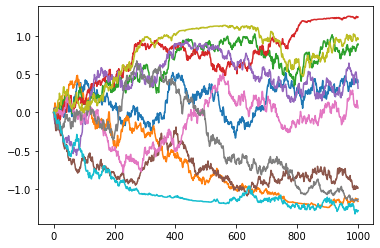

In [ ]:
np.random.seed(60)
I2 = []
for i in range(10):
  It2 = [0]
  B = [0]
  B3 = [0]
  for j in range(1000):
    B.append(np.sqrt(0.001) * np.random.standard_normal() + B[-1])
    B3.append(np.cos(B[-1]))
    It2.append(B3[-2] * (B[-1] - B[-2]) + It2[-1])
  I2.append(It2)
for i in range(10):
  plt.plot(I2[i])

\begin{align}
        1 - \int_0^{t} e^{s/2} \, \sin \, B_s \, \mathrm{d}B_s. \\[1em]
    \end{align}

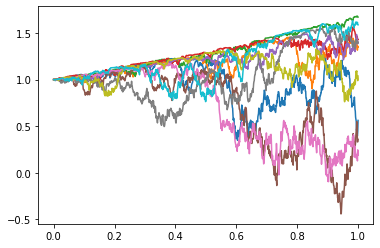

In [ ]:
np.random.seed(35)
I3 = []
for i in range(10):
  It3 = [0]
  B = [0]
  B3 = [0]
  for j in range(1000):
    s = (j+1) * 0.001
    B.append(np.sqrt(0.001) * np.random.standard_normal() + B[-1])
    B3.append(np.exp(s/2) * np.sin(B[-1]))
    It3.append(B3[-2] * (B[-1] - B[-2]) + It3[-1])
  I3.append(1-np.array(It3))
for i in range(10):
  plt.plot(x, I3[i])

#**5.2. Ornstein-Uhlenbeck process and Brownian bridge revisited**

Ornstein-Uhlenbeck: 
\begin{align}
        e^{-t} \int_0^{t} e^s \, \mathrm{d}B_s. \\[1em]
    \end{align}

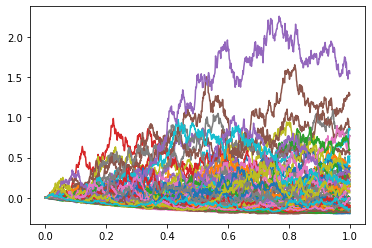

In [ ]:
for i in range(100):
  I = [0]
  B = [0]
  B3 = [0]
  for j in range(1000):
    s = (j+1) * 0.001
    B.append(np.sqrt(0.001) * np.random.standard_normal() + B[-1])
    B3.append(np.exp(s))
    I.append(B[-2] * (B[-1] - B[-2]) + I[-1])
  x = np.linspace(0.0, 1.0, 1001)
  I = np.exp(-x) * np.array(I)
  plt.plot(x, I)

Brownian bridge: 
\begin{align}
        (1 - t) \int_0^{t} \frac{1}{1 - s} \, \mathrm{d}B_s. \\[1em]
    \end{align}

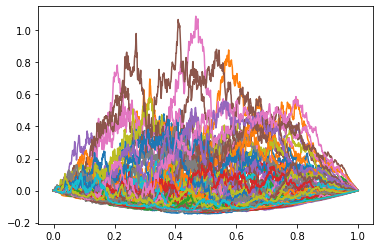

In [ ]:
for i in range(100):
  I = [0]
  B = [0]
  B3 = [0]
  for j in range(999):
    s = (j+1) * 0.001
    B.append(np.sqrt(0.001) * np.random.standard_normal() + B[-1])
    B3.append(1 / (1 - s))
    I.append(B[-2] * (B[-1] - B[-2]) + I[-1])
  I.append(0)
  x = np.linspace(0.0, 1.0, 1001)
  I = (1 - x) * np.array(I)
  plt.plot(x, I)

They have the same appearance. However the new ones don't take negative values like the others.

#**5.3. Itô's formula**

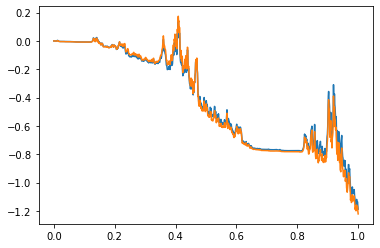

In [ ]:
np.random.seed(50)
P1 = []
for i in range(10):
  I = [0]
  B = [0]
  B2 = [0]
  B4 = [0]
  for j in range(1000):
    B.append(np.sqrt(0.001) * np.random.standard_normal() + B[-1])
    B2.append(B[-1]**2)
    B4.append(B[-1]**4)
    I.append(B2[-2] * 0.001 + I[-1])
  P1.append(np.array(B4) - 6 * np.array(I))
plt.plot(x, P1[1])
plt.plot(x, I1[1])

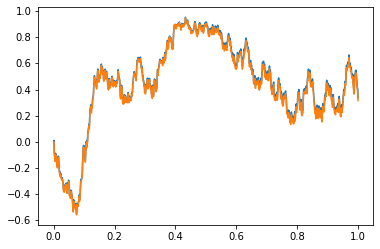

In [ ]:
np.random.seed(60)
P2 = []
for i in range(10):
  I = [0]
  B = [0]
  Bsin = [0]
  for j in range(1000):
    B.append(np.sqrt(0.001) * np.random.standard_normal() + B[-1])
    Bsin.append(np.sin(B[-1]))
    I.append(Bsin[-2] * 0.001 + I[-1])
  P2.append(np.array(Bsin) + 0.5 * np.array(I))
plt.plot(x, P2[4])
plt.plot(x, I2[4])

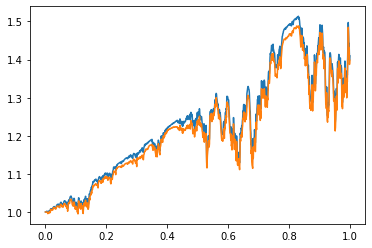

In [ ]:
np.random.seed(35)
P3 = []
for i in range(10):
  B = [0]
  Bcos = [1]
  for j in range(1000):
    B.append(np.sqrt(0.001) * np.random.standard_normal() + B[-1])
    Bcos.append(np.cos(B[-1]))
  t = np.linspace(0.0, 1.0, 1001)
  P3.append(np.exp(t/2) * np.array(Bcos))
plt.plot(x, P3[4])
plt.plot(x, I3[4])

#**5.4. A path-dependent integrand**

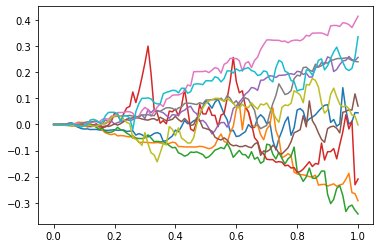

In [ ]:
for i in range(10):
  I = [0]
  B = [0]
  X = [0]
  for j in range(100):
    B.append(np.sqrt(0.01) * np.random.standard_normal() + B[-1])
    X.append(B[-2] * (B[-1] - B[-2]) + X[-1])
    I.append(X[-2] * (B[-1] - B[-2]) + I[-1])
  x = np.linspace(0.0, 1.0, 101)
  plt.plot(x, I)

#**5.5. Convergence of Itô's formula**

Step = 0.1

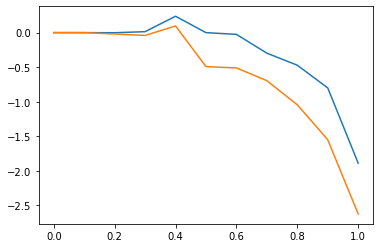

In [ ]:
I = []
J = []
for i in range(100):
  I1 = [0]
  I2 = [0]
  B = [0]
  B2 = [0]
  B3 = [0]
  for j in range(10):
    B.append(np.sqrt(0.1) * np.random.standard_normal() + B[-1])
    B2.append(B[-1]**2)
    B3.append(B[-1]**3)
    I1.append(B[-2] * 0.1 + I1[-1])
    I2.append(B2[-2]* (B[-1] - B[-2]) + I2[-1])
  I.append(np.array(B3))
  J.append(3 * np.array(I2) + 3 * np.array(I1))
x = np.linspace(0.0, 1.0, 11)
plt.plot(x, I[0])
plt.plot(x, J[0])

In [ ]:
E = np.sum(np.abs(np.array(I)-np.array(J)), axis=0)[-1] / 100
E

0.6216536716621383

Step = 0.01

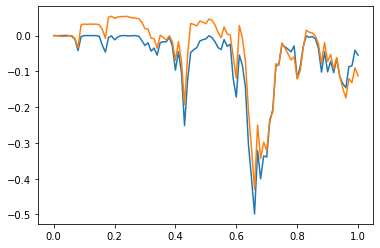

In [ ]:
I = []
J = []
for i in range(100):
  I1 = [0]
  I2 = [0]
  B = [0]
  B2 = [0]
  B3 = [0]
  for j in range(100):
    B.append(np.sqrt(0.01) * np.random.standard_normal() + B[-1])
    B2.append(B[-1]**2)
    B3.append(B[-1]**3)
    I1.append(B[-2] * 0.01 + I1[-1])
    I2.append(B2[-2]* (B[-1] - B[-2]) + I2[-1])
  I.append(np.array(B3))
  J.append(3 * np.array(I2) + 3 * np.array(I1))
x = np.linspace(0.0, 1.0, 101)
plt.plot(x, I[0])
plt.plot(x, J[0])

In [ ]:
E = np.sum(np.abs(np.array(I)-np.array(J)), axis=0)[-1] / 100
E

0.19829505479872672

Step = 0.001

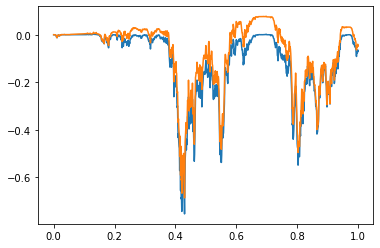

In [ ]:
I = []
J = []
for i in range(100):
  I1 = [0]
  I2 = [0]
  B = [0]
  B2 = [0]
  B3 = [0]
  for j in range(1000):
    B.append(np.sqrt(0.001) * np.random.standard_normal() + B[-1])
    B2.append(B[-1]**2)
    B3.append(B[-1]**3)
    I1.append(B[-2] * 0.001 + I1[-1])
    I2.append(B2[-2]* (B[-1] - B[-2]) + I2[-1])
  I.append(np.array(B3))
  J.append(3 * np.array(I2) + 3 * np.array(I1))
x = np.linspace(0.0, 1.0, 1001)
plt.plot(x, I[0])
plt.plot(x, J[0])

In [ ]:
E = np.sum(np.abs(np.array(I)-np.array(J)), axis=0)[-1] / 100
E

0.05983310951273344

Step = 0.0001

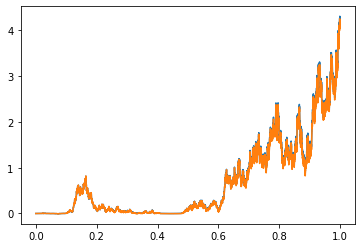

In [ ]:
I = []
J = []
for i in range(100):
  I1 = [0]
  I2 = [0]
  B = [0]
  B2 = [0]
  B3 = [0]
  for j in range(10000):
    B.append(np.sqrt(0.0001) * np.random.standard_normal() + B[-1])
    B2.append(B[-1]**2)
    B3.append(B[-1]**3)
    I1.append(B[-2] * 0.0001 + I1[-1])
    I2.append(B2[-2]* (B[-1] - B[-2]) + I2[-1])
  I.append(np.array(B3))
  J.append(3 * np.array(I2) + 3 * np.array(I1))
x = np.linspace(0.0, 1.0, 10001)
plt.plot(x, I[0])
plt.plot(x, J[0])

In [ ]:
E = np.sum(np.abs(np.array(I)-np.array(J)), axis=0)[-1] / 100
E

0.020369759252185458

We notice that the expectation of the difference between the two processes decreases when we lower the dicretization (n goes to infinity).

#**5.6. Testing the solution to the gambler's ruin**

Step = 0.01

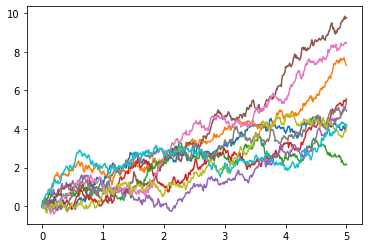

In [ ]:
Bd = []
for i in range(10000):
  B = [0]
  for j in range(500):
    B.append(np.sqrt(0.01) * np.random.standard_normal() + B[-1])
  t = np.linspace(0.0, 5.0, 501)
  Bd.append(np.array(B) + t)
for i in range(10):
  plt.plot(t, Bd[i])

In [ ]:
Bd = np.array(Bd)
X = list((-1>=Bd) + 0)
n = 0
for i in range(10000):
  n += (1 in X[i])
print(n/10000)

0.1217


In [ ]:
np.exp(-2)

0.1353352832366127

step = 0.001

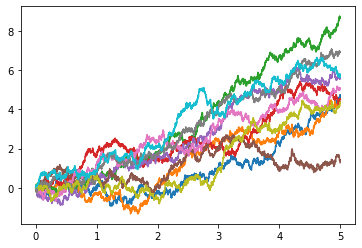

In [ ]:
Bd = []
for i in range(10000):
  B = [0]
  for j in range(5000):
    B.append(np.sqrt(0.001) * np.random.standard_normal() + B[-1])
  t = np.linspace(0.0, 5.0, 5001)
  Bd.append(np.array(B) + t)
for i in range(10):
  plt.plot(t, Bd[i])

In [ ]:
Bd = np.array(Bd)
X = list((-1>=Bd) + 0)
n = 0
for i in range(10000):
  n += (1 in X[i])
print(n/10000)

0.1361


#**5.7. The integral of a process not in $ℒ_c^2(T)$**

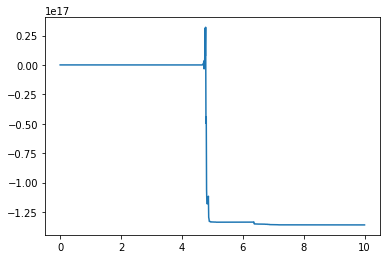

In [ ]:
I = []
Z = []
for i in range(100):
  It = [0]
  B = [0]
  Zt = [1]
  for j in range(1000):
    B.append(np.sqrt(0.01) * np.random.standard_normal() + B[-1])
    Zt.append(np.exp(B[-1] ** 2))
    It.append(Zt[-2] * (B[-1] - B[-2]) + It[-1])
  I.append(It)
  Z.append(Zt)
x = np.linspace(0.0, 10.0, 1001)
for i in range(1):
  plt.plot(x, I[i])

#**5.8. Tanaka's formula**

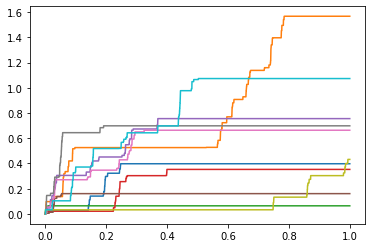

In [10]:
np.random.seed(50)
P = []
L = []
for i in range(10):
  It = [0]
  B = [0]
  Babs = [0]
  Lt = [0]
  for j in range(10000):
    B.append(np.sqrt(0.0001) * np.random.standard_normal() + B[-1])
    Babs.append(np.abs(B[-1]))
    It.append(np.sign(B[-2]) * (B[-1] - B[-2]) + It[-1])
    X = list((0.001 > np.array(Babs)) + 0)
    Lt.append(np.sum(X) * 0.5 *0.1)
  P.append(np.array(Babs) - np.array(It))
  L.append(Lt)
x = np.linspace(0.0, 1.0, 10001)
for i in range(10):
  plt.plot(x, P[i])

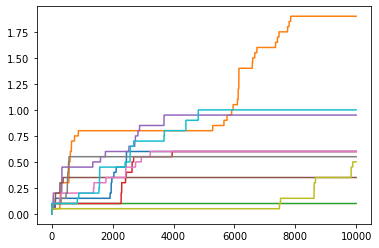

In [11]:
for i in range(10):
  plt.plot(L[i])